<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importanto-e-definindo-os-parâmetros-de-cor" data-toc-modified-id="Importanto-e-definindo-os-parâmetros-de-cor-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importanto e definindo os parâmetros de cor</a></span></li><li><span><a href="#CMC-e-compostos,-categórico" data-toc-modified-id="CMC-e-compostos,-categórico-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>CMC e compostos, categórico</a></span></li><li><span><a href="#CMC-e-DH-em-função-da-concentração-de-aditivo" data-toc-modified-id="CMC-e-DH-em-função-da-concentração-de-aditivo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>CMC e DH em função da concentração de aditivo</a></span></li><li><span><a href="#CMC-e-DH-em-função-do-índice-de-refração" data-toc-modified-id="CMC-e-DH-em-função-do-índice-de-refração-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CMC e DH em função do índice de refração</a></span></li><li><span><a href="#CMC-e-DH-em-função-da-cte-dielétrica" data-toc-modified-id="CMC-e-DH-em-função-da-cte-dielétrica-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CMC e DH em função da cte dielétrica</a></span></li><li><span><a href="#CMC-e-DH-por-G" data-toc-modified-id="CMC-e-DH-por-G-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CMC e DH por G</a></span></li><li><span><a href="#CMC-por-DH" data-toc-modified-id="CMC-por-DH-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>CMC por DH</a></span></li></ul></div>

# Importanto e definindo os parâmetros de cor

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import locale
locale.setlocale(locale.LC_ALL, '')

import matplotlib as mpl
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})
mpl.rcParams.update({'mathtext.fontset':'dejavusans'})
mpl.rcParams['axes.formatter.use_locale'] = True

img_path = r'../../../itc/'

In [19]:
dados = pd.read_csv('CMC_DH.csv', sep=';', decimal=',')
dados.head()

,Composto,Concentração (% m/m),cmc/mM,DeltaH/kJ.mol-1,Índice de refração,Viscosidade,Cte dielétrica,Param Gordon
0,Água,0,3.980465,-4.331863,1.33250,1.002,80.20,2.726480
1,Glicerina,5,3.952720,-7.593361,1.33880,1.127,78.96,2.749596
2,Glicerina,10,3.792220,-7.739862,1.34481,1.310,77.55,2.704220
3,Glicerina,20,3.996950,-12.616962,1.35749,1.760,74.72,2.605320
4,Glicerina,30,4.387000,-15.175343,1.37070,2.500,71.77,2.506420


In [92]:
dados['Composto'].unique()
#Cores = {'Água':'k', 'Glicerina':'r', 'Sacarose':'b', 'Ureia':'g', '1,3BD':'magenta', 'DMSO':'purple'}
Cores = {'Água':'k', 'Glicerina':'#e67300', 'Sacarose':'#00b300', 
         'Ureia':'#ff0000', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
# Cores = {'Água':'#ff0000', 'Glicerina':'#ff8000', 'Sacarose':'#00b300', 
#          'Ureia':'#0099cc', '1,3BD':'#0000ff', 'DMSO':'#bf00ff'}
Simbolos = {'Água':'s', 'Glicerina':'o', 'Sacarose':'<', 'Ureia':'>', '1,3BD':'v', 'DMSO':'^'}
def_markersize = 10

# CMC e compostos, categórico

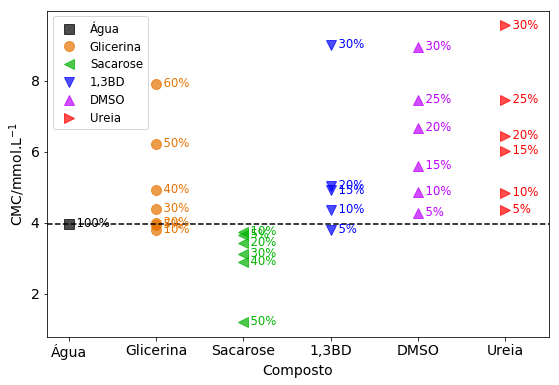

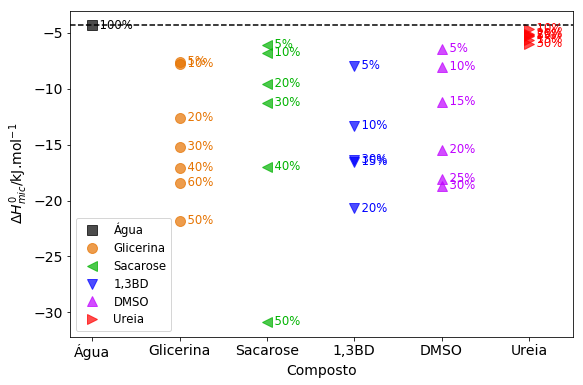

In [93]:
mpl.rcParams.update({'font.size': 14, 'text.usetex':False})

fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Composto'], dados[dados['Composto'] == comp]['cmc/mM'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Composto'], dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp,
               c=Cores[comp], marker=Simbolos[comp], markersize=def_markersize, linewidth=0, alpha=0.7)

    
ax1.legend(fontsize='small')
ax1.set_xlabel('Composto')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')
ax1.set_xlim(-0.252, 5.5)

for i, conc in enumerate(dados['cmc/mM']):
    c = f"{dados['Concentração (% m/m)'].iloc[i]}"
    if c == '0':
        c = '100'
    ax1.text(dados['Composto'].iloc[i], conc, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
            fontsize='small', ha='left', va='center')

ax2.legend(fontsize='small')
ax2.set_xlabel('Composto')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')
ax2.set_xlim(-0.252, 5.5)

for i, DH in enumerate(dados['DeltaH/kJ.mol-1']):
    c = f"{dados['Concentração (% m/m)'].iloc[i]}"
    if c == '0':
        c = '100'
    ax2.text(dados['Composto'].iloc[i], DH, f"  {c}%", color=Cores[dados['Composto'].iloc[i]],
            fontsize='small', ha='left', va='center')

fig1.savefig(img_path + 'CMC_por_composto.pdf')
fig2.savefig(img_path + 'DH_por_composto.pdf')

# CMC e DH em função da concentração de aditivo

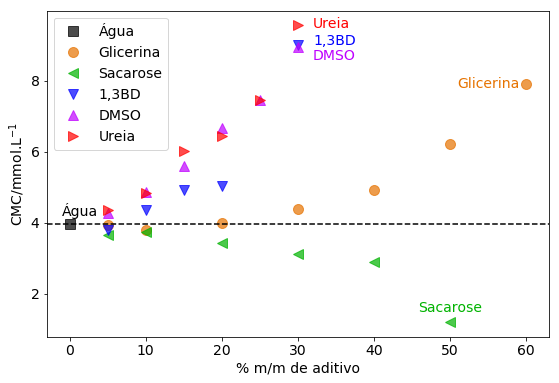

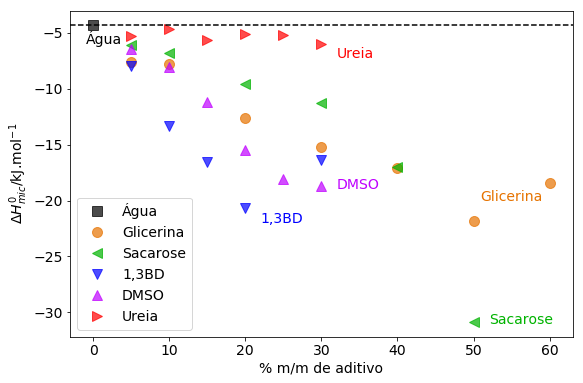

In [102]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Concentração (% m/m)'], 
                dados[dados['Composto'] == comp]['cmc/mM'], label=comp, color=Cores[comp], marker=Simbolos[comp],
            linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Concentração (% m/m)'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, color=Cores[comp], marker=Simbolos[comp],
            linewidth=0, markersize=def_markersize, alpha=0.7)
#     ax1.text(x = dados[dados['Composto'] == comp].iloc[-1, 1], y = dados[dados['Composto'] == comp].iloc[-1, 2] - 0.5,
#             s = comp, color=Cores[comp], ha='center')
#     ax2.text(x = dados[dados['Composto'] == comp].iloc[-1, 1], y = dados[dados['Composto'] == comp].iloc[-1, 3] - 1.5,
#             s = comp, color=Cores[comp], ha='center')

    
ax1.legend()
ax1.set_xlabel('% m/m de aditivo')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')

ax2.legend()
ax2.set_xlabel('% m/m de aditivo')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

ax1.text(x=55, y=7.8, s='Glicerina', color=Cores['Glicerina'], ha='center')
ax1.text(x=50, y=1.5, s='Sacarose', color=Cores['Sacarose'], ha='center')
ax1.text(x=32, y=9, s='1,3BD', color=Cores['1,3BD'])
ax1.text(x=32, y=8.6, s='DMSO', color=Cores['DMSO'])
ax1.text(x=32, y=9.5, s='Ureia', color=Cores['Ureia'])
ax1.text(x=-1, y=4.2, s='Água', color=Cores['Água'])

ax2.text(x=55, y=-20, s='Glicerina', color=Cores['Glicerina'], ha='center')
ax2.text(x=52, y=-31, s='Sacarose', color=Cores['Sacarose'])
ax2.text(x=22, y=-22, s='1,3BD', color=Cores['1,3BD'])
ax2.text(x=32, y=-19, s='DMSO', color=Cores['DMSO'])
ax2.text(x=32, y=-7.2, s='Ureia', color=Cores['Ureia'])
ax2.text(x=-1, y=-6, s='Água', color=Cores['Água'])

fig1.savefig(img_path + 'ITC_cmc_adit.pdf')
fig2.savefig(img_path + 'ITC_DH_adit.pdf')

# CMC e DH em função do índice de refração

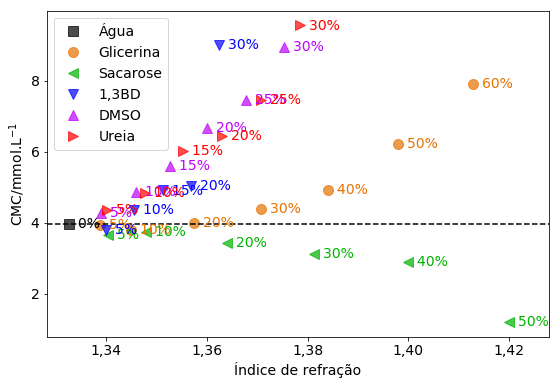

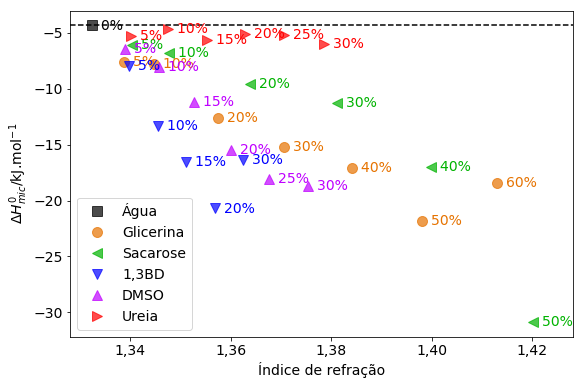

In [95]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Índice de refração'], 
             dados[dados['Composto'] == comp]['cmc/mM'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Índice de refração'], 
             dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)

    
ax1.legend()
ax1.set_xlabel('Índice de refração')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')


ax2.legend()
ax2.set_xlabel('Índice de refração')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

for i, conc in enumerate(dados['cmc/mM']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['Índice de refração'].iloc[i], conc, f"  {texto}%", 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax2.text(dados['Índice de refração'].iloc[i], conc, f'  {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], va='center', ha='left')

# right=1.42488
ax1.set_xlim(right=1.428)
ax2.set_xlim(right=1.428)

fig1.savefig(img_path + 'CMC_por_n.pdf')
fig2.savefig(img_path + 'DH_por_n.pdf')

# CMC e DH em função da cte dielétrica

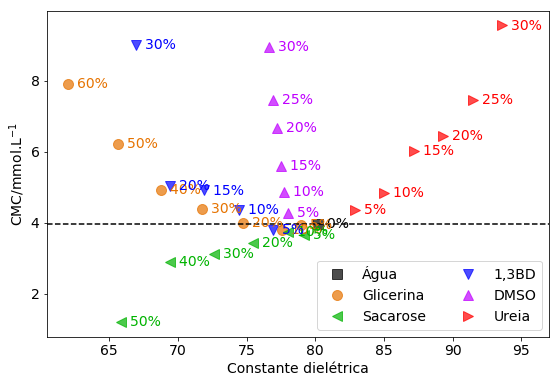

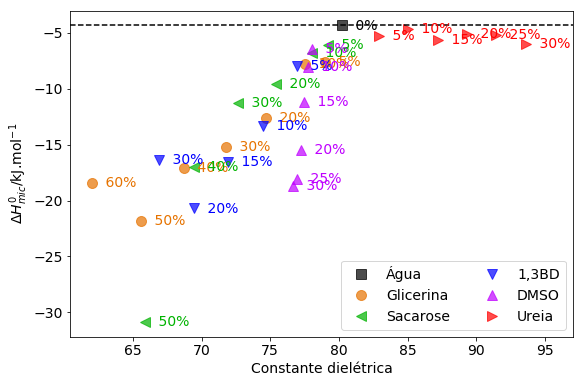

In [96]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Cte dielétrica'], 
                dados[dados['Composto'] == comp]['cmc/mM'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Cte dielétrica'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)

    
ax1.legend(ncol=2)
ax1.set_xlabel('Constante dielétrica')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')

ax2.legend(ncol=2)
ax2.set_xlabel('Constante dielétrica')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

for i, conc in enumerate(dados['cmc/mM']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['Cte dielétrica'].iloc[i], conc, f'  {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax2.text(dados['Cte dielétrica'].iloc[i], conc, f'   {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

# right= 95.18009599999999
ax1.set_xlim(right=97)
ax2.set_xlim(right=97)
fig1.savefig(img_path + 'CMC_por_eps.pdf')
fig2.savefig(img_path + 'DH_por_eps.pdf')


# CMC e DH por G

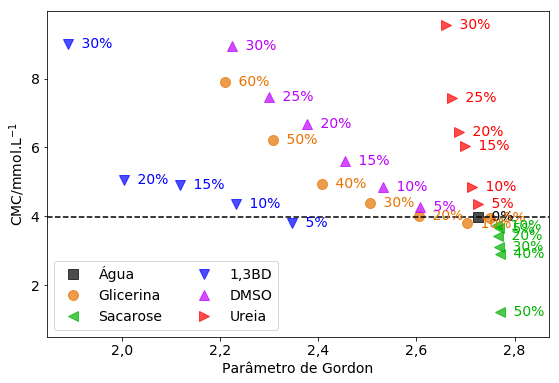

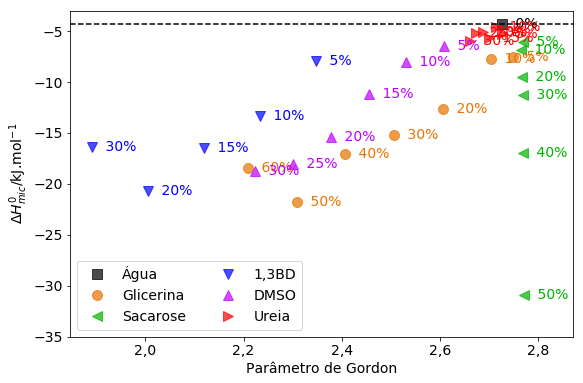

In [97]:
fig1, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))

for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['Param Gordon'], 
                dados[dados['Composto'] == comp]['cmc/mM'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   
    ax2.plot(dados[dados['Composto'] == comp]['Param Gordon'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
             color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)

    
ax1.legend(ncol=2)
ax1.set_xlabel('Parâmetro de Gordon')
ax1.set_ylabel('CMC/mmol.L$^{-1}$')
ax1.axhline(y=dados.iloc[0]['cmc/mM'], color='k', linestyle='--')

ax2.legend(ncol=2)
ax2.set_xlabel('Parâmetro de Gordon')
ax2.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')
ax2.axhline(y=dados.iloc[0]['DeltaH/kJ.mol-1'], color='k', linestyle='--')

for i, conc in enumerate(dados['cmc/mM']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['Param Gordon'].iloc[i], conc, f'   {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax2.text(dados['Param Gordon'].iloc[i], conc, f'   {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

# right = 2.8153860649999998
ax1.set_xlim(right=2.87)
ax2.set_xlim(right=2.87)

# bottom=0.7926174999999999
ax1.set_ylim(bottom=0.5)
ax2.set_ylim(bottom=-35)
fig1.savefig(img_path + 'CMC_por_G.pdf')
fig2.savefig(img_path + 'DH_por_G.pdf')

# CMC por DH

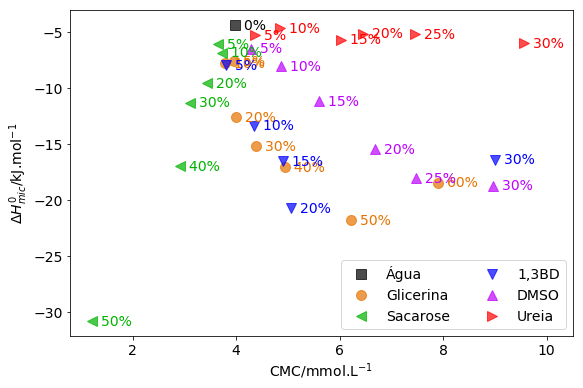

In [98]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(9,6))
for comp in dados['Composto'].unique():
    ax1.plot(dados[dados['Composto'] == comp]['cmc/mM'], 
                dados[dados['Composto'] == comp]['DeltaH/kJ.mol-1'], label=comp, 
                color=Cores[comp], marker=Simbolos[comp], linewidth=0, markersize=def_markersize, alpha=0.7)   

for i, conc in enumerate(dados['DeltaH/kJ.mol-1']):
    ax2.text(dados['Param Gordon'].iloc[i], conc-1.5, dados['Concentração (% m/m)'].iloc[i], 
             color=Cores[dados['Composto'].iloc[i]], ha='center')
    
ax1.legend(ncol=2)
ax1.set_xlabel('CMC/mmol.L$^{-1}$')
ax1.set_ylabel('$\Delta H^0_{mic}$/kJ.mol$^{-1}$')

for i, DH in enumerate(dados['DeltaH/kJ.mol-1']):
    texto = dados['Concentração (% m/m)'].iloc[i]
    ax1.text(dados['cmc/mM'].iloc[i], DH, f'  {texto}%', 
             color=Cores[dados['Composto'].iloc[i]], ha='left', va='center')

#right=9.975032500000001
ax1.set_xlim(right=10.5)
fig.savefig(img_path + 'DH_por_cmc.pdf')